In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import os
# ROOT.enableJSVis()
c1 = ROOT.TCanvas()
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")   

Welcome to JupyROOT 6.22/02


0

the baseline of the pulse was 32007.766
The maximum of the trapezoid is 24.09886486486357


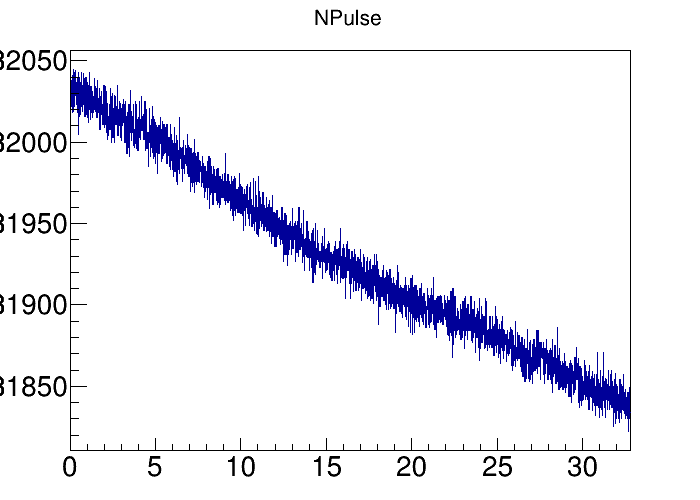

In [4]:
# infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/SCAN100004/SCAN100004_RUN13.root")
infile = ROOT.TFile("/data/ppc/ortecppc/T1/NOISE/NOISE_RUN_6/NOISE_RUN6_1_0.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
tree.GetEntry(544)
npulse = nevent.GetPulse(0)
sP = npulse.GetSamplingPeriod()

blrPulse = ROOT.NPulse()
blrFilter = ROOT.NFBaselineRemover(1000*sP) #use 1000 samples to calculate the baseline
blrFilter.Filter(npulse,blrPulse)# apply the filter
baseline = blrFilter.GetCalcParameterByName("Baseline")
print("the baseline of the pulse was",baseline)

trapPulse = ROOT.NPulse() #to hold the filtered result
trapFilter = ROOT.NFTrapezoid(300,0,0,baseline) #tau of about 6000 samples
#trapFilter.SetRiseNS(35)
#trapFilter.SetGapNS(17)
trapFilter.SetBaseline(baseline)
trapFilter.Filter(npulse,trapPulse)
print("The maximum of the trapezoid is",trapFilter.GetCalcParameterByName("MaxAbs"))

# npcFilter = ROOT.NPCMinMax()
# npcFilter.CalculateParameters(trapPulse)
# print(npcFilter.GetCalcParameterByName("MaxTime"))

pulseh = npulse.GetTH1Dmus()
traph = trapPulse.GetTH1Dmus()
traph.SetLineColor(3)
pulseh.Draw()
# traph.Draw("Same")
c1.Draw()
c1.SetWindowSize(1000,1000)
c1.SetCanvasSize(700,500)
pulseh.GetXaxis().SetLabelSize(0.06)
pulseh.GetYaxis().SetLabelSize(0.06)
pulseh.GetXaxis().SetTitleSize(444)
pulseh.GetYaxis().SetTitleSize(444)
pulseh.SetStats(0)
# pulseh.SetLineWidth(3)